#### Installing Required Libraries

In [1]:
!pip install gdown grpcio-status==1.33.2 protobuf==3.19.6 seaborn xgboost scikit-learn nltk

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.3/774.3 kB 36.8 MB/s eta 0:00:00
  Created wheel for grpcio-status: filename=grpcio_status-1.33.2-py3-none-any.whl size=9303 sha256=deb2288606c9a2aed9bd66be2ce7b4d517b991a831192206813a57f1ba412115
  Stored in directory: /root/.cache/pip/wheels/62/d6/3d/82c5881e016620d21e47f047ec46f10c6b1ae07bed6d75a9f2
Successfully built grpcio-status
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.4
    Uninstalling protobuf-4.23.4:
      Successfully uninstalled protobuf-4.23.4
ERROR: pip's dependency resolver does not currently take into account al

In [2]:
!pip install --upgrade protobuf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 5.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 1.34.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<4.0.0dev,>=3.19.5, but you have protobuf 4.24.3 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"]="python"

#### Downloading the Dataset from Gdrive

In [4]:
!gdown 11so6cfFTwIU4EeRw7ns_LHfDV9BqPmPh

Downloading...
From (uriginal): https://drive.google.com/uc?id=11so6cfFTwIU4EeRw7ns_LHfDV9BqPmPh
From (redirected): https://drive.google.com/uc?id=11so6cfFTwIU4EeRw7ns_LHfDV9BqPmPh&confirm=t&uuid=ed9d66a5-7f89-4d1e-8208-f76de08520da
To: /kaggle/working/complaints.csv
100%|██████████████████████████████████████| 2.77G/2.77G [00:27<00:00, 99.7MB/s]


#### Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import xgboost as xgb
from tqdm import tqdm
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import BatchNormalization
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.callbacks import EarlyStopping
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from tensorflow.keras.layers import LSTM, GRU,SimpleRNN, RNN
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
import tensorflow as tf

D0922 12:29:31.081700598      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0922 12:29:31.081725659      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0922 12:29:31.081729236      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0922 12:29:31.081732140      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0922 12:29:31.081734683      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0922 12:29:31.081737414      15 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0922 12:29:31.081740164      15 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0922 12:29:31.

In [6]:
import tensorflow as tf

#### Initializing TPU

In [7]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

Device: 
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


Number of replicas: 8


### Exploratory Data Analysis and Feature Engineering

#### Understanding the data

In [8]:
# Top 10 rows
df = pd.read_csv("complaints.csv")
df.head(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",FL,33009,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7523056
1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",MI,48234,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7523057
2,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",GA,30034,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7446803
3,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",CO,80249,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7446804
4,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,XXXXX,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7442566
5,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",CA,95648,NaN,Other,Web,2023-08-23,In progress,Yes,NaN,7446815
6,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",NY,XXXXX,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7446610
7,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,OR,97209,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7442804
8,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,NY,11550,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7442745
9,2023-08-23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,GA,30228,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7442823


In [9]:
# Shape of dataset
df.shape

(4051252, 18)

In [10]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4051252 entries, 0 to 4051251
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 556.

#### Checking Missing values in the data

In [11]:
# Checking Missing values in the data
df.isnull().any()

Date received                   False
Product                         False
Sub-product                      True
Issue                           False
Sub-issue                        True
Consumer complaint narrative     True
Company public response          True
Company                         False
State                            True
ZIP code                         True
Tags                             True
Consumer consent provided?       True
Submitted via                   False
Date sent to company            False
Company response to consumer     True
Timely response?                False
Consumer disputed?               True
Complaint ID                    False
dtype: bool

In [12]:
# Number of missing values in each column
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        715933
Consumer complaint narrative    2584946
Company public response         2180903
Company                               0
State                             43182
ZIP code                          30209
Tags                            3626984
Consumer consent provided?       903030
Submitted via                         0
Date sent to company                  0
Company response to consumer          5
Timely response?                      0
Consumer disputed?              3282894
Complaint ID                          0
dtype: int64

In [13]:
# Columns with missing values
missing_cols = ['Sub-product','Sub-issue','Consumer complaint narrative','Company public response','State','ZIP code','Tags','Consumer consent provided?',
                   'Company response to consumer','Consumer disputed?']
print(missing_cols)

['Sub-product', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Company response to consumer', 'Consumer disputed?']


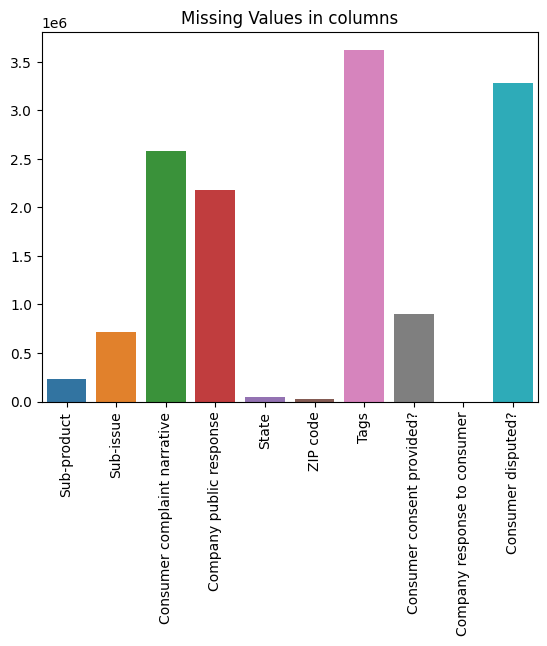

In [14]:
# Bar plot of missing value columns
sns.barplot(x=df[missing_cols].isnull().sum().index, y=df[missing_cols].isnull().sum().values)
plt.xticks(rotation=90)
plt.title('Missing Values in columns')
plt.show()

There are so many product categories, but there are many duplicates

We will group similar categories and categorize them into 4 main categories:
- Credit reporting, repair, or other
- Debt collection
- Consumer Loan
- Mortgage

**Product** column is our target variable.

In [15]:
df['Product'].value_counts()

Product
Credit reporting, credit repair services, or other personal consumer reports    2167566
Debt collection                                                                  504522
Mortgage                                                                         383525
Credit card or prepaid card                                                      206191
Checking or savings account                                                      181224
Credit reporting                                                                 140429
Credit card                                                                       90195
Bank account or service                                                           86205
Student loan                                                                      76337
Money transfer, virtual currency, or money service                                58354
Vehicle loan or lease                                                             47298
Consumer Loan           

In [16]:
# "Credit reporting, repair, or other"
df['Product'].replace(['Credit reporting, credit repair services, or other personal consumer reports','Credit card or prepaid card',
                       'Credit card or prepaid card','Checking or savings account','Credit reporting','Credit card',
                       'Bank account or service','Money transfer, virtual currency, or money service','Credit reporting or other personal consumer reports',
                       'Money transfers','Prepaid card','Other financial service','Virtual currency'],'Credit reporting, repair, or other',inplace=True)


In [17]:
# "Debt collection"
df['Product'].replace(['Debt collection','Debt or credit management'],'Debt collection',inplace=True)

In [18]:
# "Consumer loan"
df['Product'].replace(['Student loan','Vehicle loan or lease','Consumer Loan','Payday loan, title loan, or personal loan','Payday loan',
                       'Payday loan, title loan, personal loan, or advance loan'],'Consumer Loan',inplace=True)

We have categorized all the products into 4 main categories

In [19]:
df['Product'].value_counts()

Product
Credit reporting, repair, or other    2971750
Debt collection                        504551
Mortgage                               383525
Consumer Loan                          191426
Name: count, dtype: int64

#### Product Types vs Number of Complaints

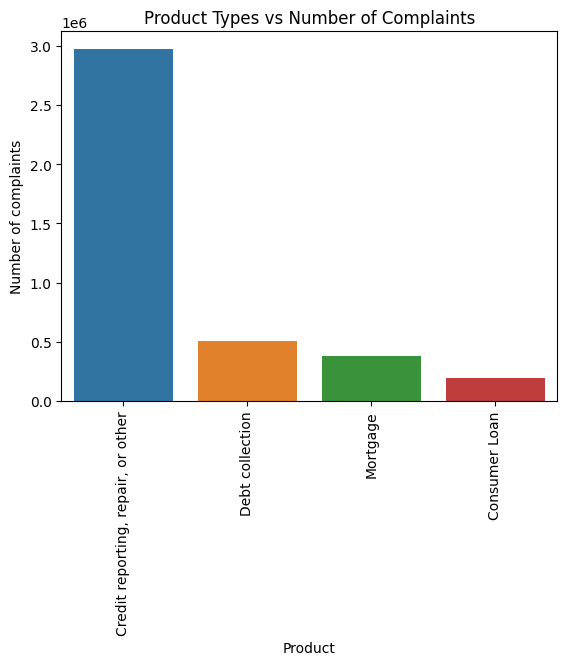

In [20]:
sns.countplot(x='Product',data=df)
plt.xticks(rotation=90)
plt.title('Product Types vs Number of Complaints')
plt.ylabel('Number of complaints')
plt.show()

#### Distribution of Company Response to consumer

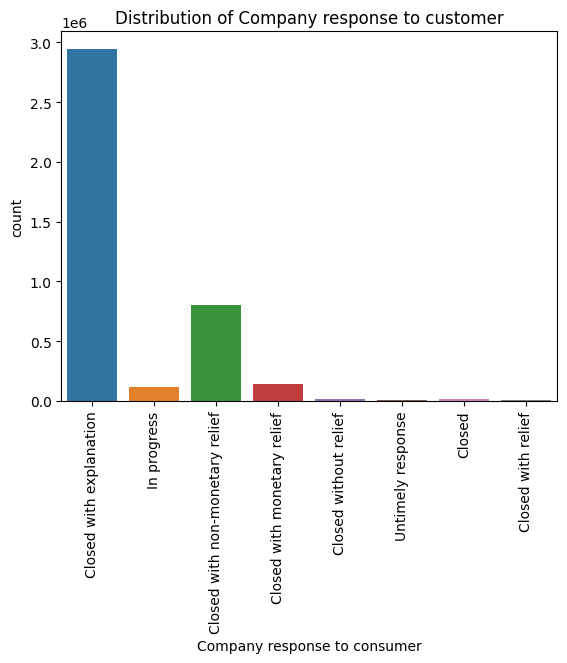

In [21]:
sns.countplot(data=df,x='Company response to consumer')
plt.xticks(rotation=90)
plt.title('Distribution of Company response to customer')
plt.show()

#### Consumer Disputed

In [22]:
disputed_cnt = df['Consumer disputed?'].value_counts()
disputed_cnt

Consumer disputed?
No     619980
Yes    148378
Name: count, dtype: int64

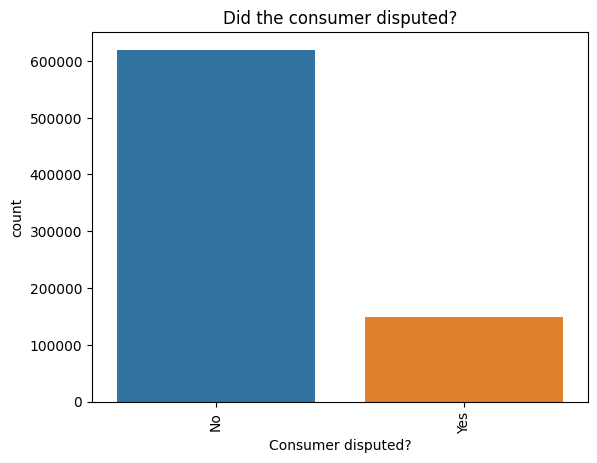

In [23]:
sns.countplot(data=df,x='Consumer disputed?')
plt.xticks(rotation=90)
plt.title('Did the consumer disputed?')
plt.show()

In [24]:
# Top 5 Disputed and Non-disputed companies
top5_disputed = df['Company'].loc[df['Consumer disputed?'] == 'Yes'].value_counts()[:5]
top5_nodisputed = df['Company'].loc[df['Consumer disputed?'] == 'No'].value_counts()[:5]

In [25]:
print('Top 5 Disputed Companies:')
print(top5_disputed)

Top 5 Disputed Companies:
Company
BANK OF AMERICA, NATIONAL ASSOCIATION    14387
WELLS FARGO & COMPANY                    11717
EQUIFAX, INC.                            10079
JPMORGAN CHASE & CO.                      9523
CITIBANK, N.A.                            6697
Name: count, dtype: int64


#### Top 5 Companies Disputed

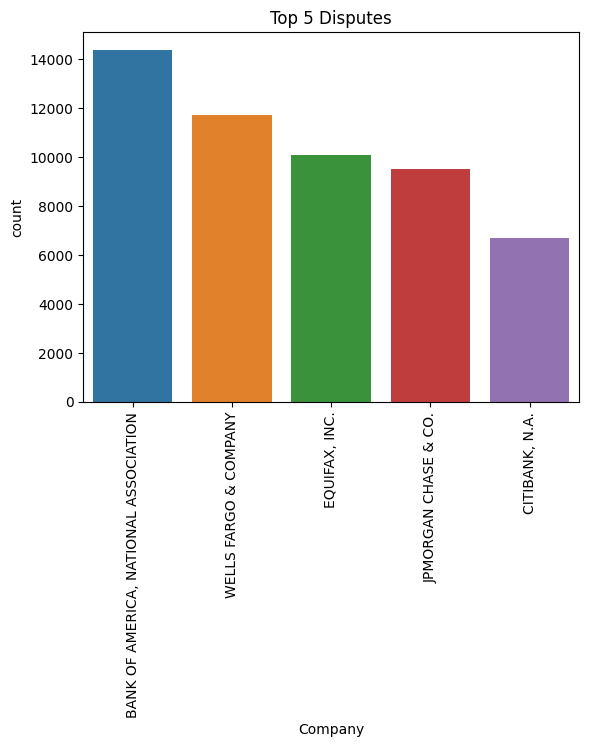

In [26]:
sns.barplot(x=top5_disputed.index,y=top5_disputed)
plt.xticks(rotation=90)
plt.title('Top 5 Disputes')
plt.show()

In [27]:
print('Top 5 Non-Disputed Companies:')
print(top5_nodisputed)

Top 5 Non-Disputed Companies:
Company
BANK OF AMERICA, NATIONAL ASSOCIATION     51605
WELLS FARGO & COMPANY                     41976
Experian Information Solutions Inc.       40292
EQUIFAX, INC.                             38311
TRANSUNION INTERMEDIATE HOLDINGS, INC.    34368
Name: count, dtype: int64


#### Top 5 companies Non-disputed

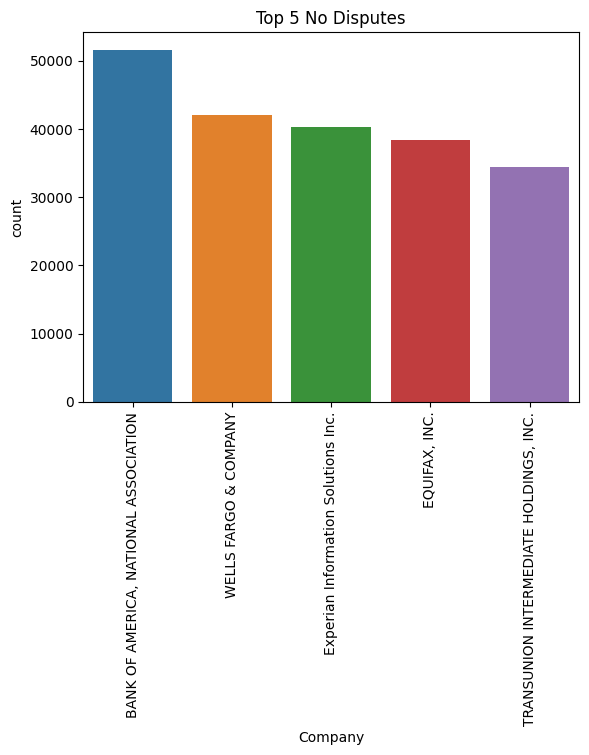

In [28]:
sns.barplot(x=top5_nodisputed.index,y=top5_nodisputed)
plt.xticks(rotation=90)
plt.title('Top 5 No Disputes')
plt.show()

In [29]:
# Converting "Date received" to pandas datetime format
df['Date received'] = pd.to_datetime(df['Date received'])
# Extracting Year and Month from "Date received"
df['Year received'], df['Month received'] = df['Date received'].dt.year, df['Date received'].dt.month
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year received,Month received
0,2023-08-25,"Credit reporting, repair, or other",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",FL,33009,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7523056,2023,8
1,2023-08-25,"Credit reporting, repair, or other",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",MI,48234,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7523057,2023,8
2,2023-08-23,"Credit reporting, repair, or other",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",GA,30034,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7446803,2023,8
3,2023-08-23,"Credit reporting, repair, or other",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",CO,80249,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7446804,2023,8
4,2023-08-23,"Credit reporting, repair, or other",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,XXXXX,NaN,NaN,Web,2023-08-23,In progress,Yes,NaN,7442566,2023,8


Counting records for each **Year received** and **Consumer disputed?**

In [30]:
groups = df.groupby(['Year received','Consumer disputed?'])['Company'].apply(lambda x: x.value_counts())

In [31]:
groups

Year received  Consumer disputed?                                       
2011           No                  BANK OF AMERICA, NATIONAL ASSOCIATION    431
                                   JPMORGAN CHASE & CO.                     298
                                   CITIBANK, N.A.                           255
                                   CAPITAL ONE FINANCIAL CORPORATION        201
                                   WELLS FARGO & COMPANY                    170
                                                                           ... 
2017           Yes                 LAW OFFICE OF JOHN E. LINDNER P.A.         1
                                   Markoff Law LLC                            1
                                   Nationwide Recovery Systems, Ltd           1
                                   Aqua Finance, Inc.                         1
                                   ResidentCheck, Inc.                        1
Name: Company, Length: 18222, dtype: int64

In [32]:
d = {'Count': groups}

In [33]:
year_df = pd.DataFrame(data=d).reset_index()
year_df.sort_values(by='Count', ascending=False)

,Year received,Consumer disputed?,level_2,Count
766,2013,No,"BANK OF AMERICA, NATIONAL ASSOCIATION",12887
10657,2016,No,"EQUIFAX, INC.",12643
10658,2016,No,Experian Information Solutions Inc.,12545
110,2012,No,"BANK OF AMERICA, NATIONAL ASSOCIATION",12318
10659,2016,No,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",11311
...,...,...,...,...
2596,2013,Yes,Merchants Credit Corporation,1
2597,2013,Yes,"Houston Home Loan, Inc.",1
2598,2013,Yes,"Eagle Accounts Group, Inc.",1
2599,2013,Yes,"Credit Service Company, INC",1


In [34]:
count_df = year_df.rename(columns={"level_2": "Company"})

In [35]:
count_df

,Year received,Consumer disputed?,Company,Count
0,2011,No,"BANK OF AMERICA, NATIONAL ASSOCIATION",431
1,2011,No,JPMORGAN CHASE & CO.,298
2,2011,No,"CITIBANK, N.A.",255
3,2011,No,CAPITAL ONE FINANCIAL CORPORATION,201
4,2011,No,WELLS FARGO & COMPANY,170
...,...,...,...,...
18217,2017,Yes,LAW OFFICE OF JOHN E. LINDNER P.A.,1
18218,2017,Yes,Markoff Law LLC,1
18219,2017,Yes,"Nationwide Recovery Systems, Ltd",1
18220,2017,Yes,"Aqua Finance, Inc.",1


#### Top 4 Companies with Consumer disputed as "Yes"

In [36]:
# Top 4 companies with Consumer disputed as "Yes"
boa_disputes = count_df.loc[(count_df['Company'] == 'BANK OF AMERICA, NATIONAL ASSOCIATION') & (count_df['Consumer disputed?'] == 'Yes')]
wfc_disputes = count_df.loc[(count_df['Company'] == 'WELLS FARGO & COMPANY') & (count_df['Consumer disputed?'] == 'Yes')]
jp_disputes = count_df.loc[(count_df['Company'] == 'JPMORGAN CHASE & CO.') & (count_df['Consumer disputed?'] == 'Yes')]
citi_disputes = count_df.loc[(count_df['Company'] == 'CITIBANK, N.A.') & (count_df['Consumer disputed?'] == 'Yes')]

In [37]:
years = boa_disputes['Year received'].values.tolist()

In [38]:
boa_disputes_amount = boa_disputes['Count'].values.tolist()
wfc_disputes_amount = wfc_disputes['Count'].values.tolist()
jp_disputes_amount = jp_disputes['Count'].values.tolist()
citi_disputes_amount = citi_disputes['Count'].values.tolist()

#### Number of Disputes (Top 4 Companies) from 2011-2017

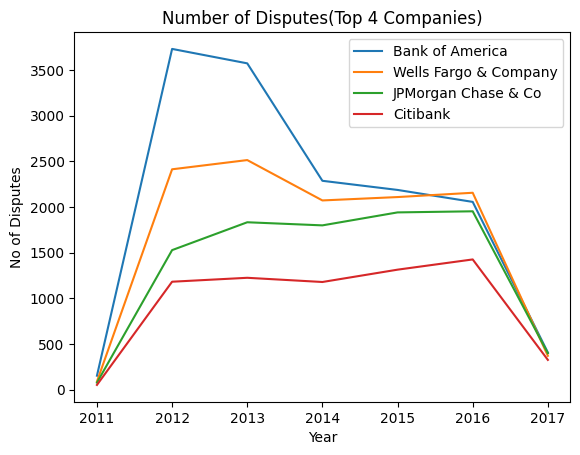

In [39]:
sns.lineplot(x=years,y=boa_disputes_amount,label='Bank of America')
sns.lineplot(x=years,y=wfc_disputes_amount,label='Wells Fargo & Company')
sns.lineplot(x=years,y=jp_disputes_amount,label='JPMorgan Chase & Co')
sns.lineplot(x=years,y=citi_disputes_amount,label='Citibank')
plt.legend()
plt.xlabel('Year')
plt.ylabel('No of Disputes')
plt.title('Number of Disputes(Top 4 Companies)')
plt.show()

#### Top 10 Complaints in Sub-product

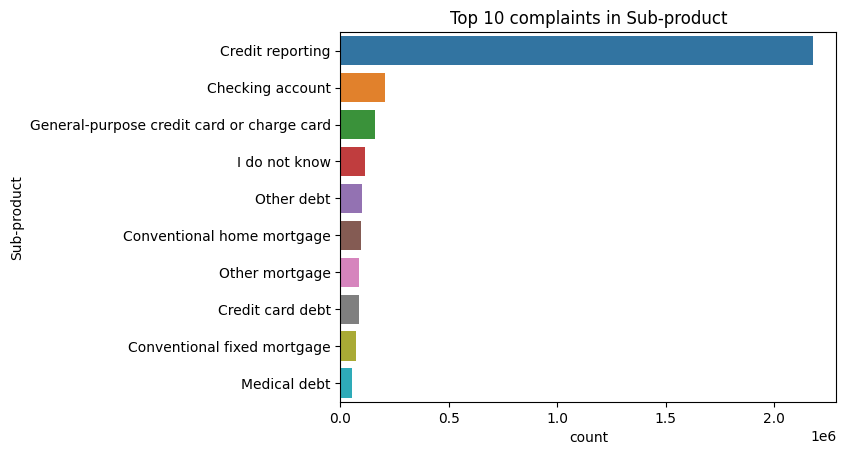

In [40]:
sns.barplot(data=df,y=df['Sub-product'].value_counts().sort_values(ascending=False)[:10].index,
           x=df['Sub-product'].value_counts().sort_values(ascending=False)[:10])
plt.title('Top 10 complaints in Sub-product')
plt.show()

#### Top 10 Companies with Most complaints

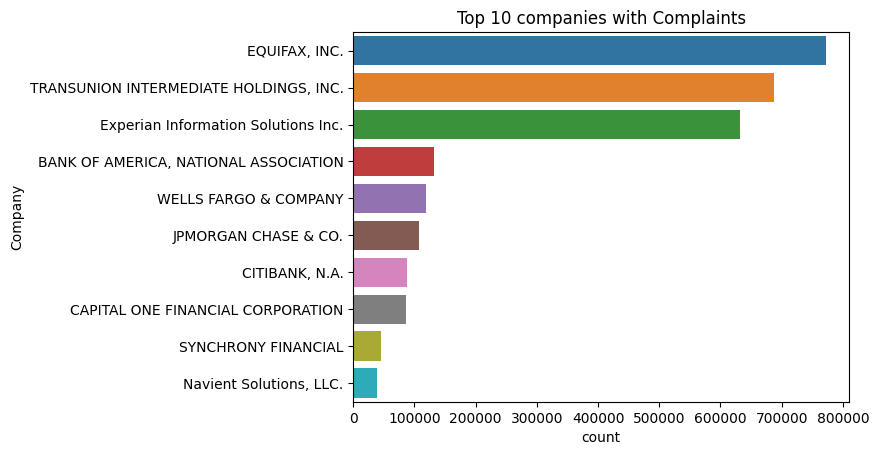

In [41]:
sns.barplot(data=df,y=df['Company'].value_counts().sort_values(ascending=False)[:10].index,
           x = df['Company'].value_counts().sort_values(ascending=False)[:10])
plt.title('Top 10 companies with Complaints')
plt.show()

Since we are performing Text Classification on consumer complaints, 

We'll remove all columns except the **Consumer complaint narrative** and **Product**

In [42]:
new_df = df[['Product','Consumer complaint narrative']].copy()

In [43]:
new_df.head()

,Product,Consumer complaint narrative
0,"Credit reporting, repair, or other",NaN
1,"Credit reporting, repair, or other",NaN
2,"Credit reporting, repair, or other",NaN
3,"Credit reporting, repair, or other",NaN
4,"Credit reporting, repair, or other",NaN


In [44]:
new_df.shape

(4051252, 2)

Dropping Rows with Missing values in **Consumer complaint**

In [45]:
new_df.isnull().sum()

Product                               0
Consumer complaint narrative    2584946
dtype: int64

In [46]:
new_df.dropna(inplace=True)

In [47]:
new_df.shape

(1466306, 2)

In [48]:
new_df.head()

,Product,Consumer complaint narrative
14,"Credit reporting, repair, or other",I am a victim of identity theft please remove ...
17,"Credit reporting, repair, or other",Please remove this inquiry from my credit repo...
18,"Credit reporting, repair, or other",The following inquiries appear on my account. ...
19,"Credit reporting, repair, or other",I've found that my credit report has erroneous...
24,"Credit reporting, repair, or other","Synchrony, Bank discount tire had Called me fo..."


In [49]:
new_df.columns = ['Product','Complaint']

In [50]:
new_df.head()

,Product,Complaint
14,"Credit reporting, repair, or other",I am a victim of identity theft please remove ...
17,"Credit reporting, repair, or other",Please remove this inquiry from my credit repo...
18,"Credit reporting, repair, or other",The following inquiries appear on my account. ...
19,"Credit reporting, repair, or other",I've found that my credit report has erroneous...
24,"Credit reporting, repair, or other","Synchrony, Bank discount tire had Called me fo..."


### Text Pre-Processing

**LowerCase**

- The most common approach in text cleaning is capitalization or lower case due to the diversity of capitalization to form a sentence.
- This technique will project all words in text and document into the same feature space.
- However, it would also cause problems with exceptional cases such as the USA or UK, which could be solved by replacing typos, slang, acronyms or informal abbreviations technique.

In [51]:
# Converting Lowercase
new_df['clean_text'] = new_df['Complaint'].apply(lambda x:x.lower())

In [52]:
import re

**Noise Removal**

Text data could include various unnecessary characters or punctuation such as URLs, HTML tags, non-ASCII characters, or other special characters (symbols, emojis, and other graphic characters).

In [53]:
def remove_URL(text):
    """
        Remove URLs from a sample string
    """
    return re.sub(r"https?://\S+|www\.\S+", "", text)

def remove_html(text):
    """
        Remove the html in sample text
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

def remove_non_ascii(text):
    """
        Remove non-ASCII characters
    """
    return re.sub(r'[^\x00-\x7f]',r'', text)

In [54]:
new_df['clean_text'] = new_df['clean_text'].apply(lambda x:remove_URL(x))

In [55]:
new_df['clean_text'] = new_df['clean_text'].apply(lambda x:remove_html(x))

In [56]:
new_df['clean_text'] = new_df['clean_text'].apply(lambda x:remove_non_ascii(x))

**Remove special characters:**

The special characters could be symbols, emojis, and other graphic characters. We use the "Toxic Comment Classification Challenge" dataset as the "Real or Not? NLP with Disaster Tweets" dataset do not have any special charaters in their text.

In [57]:
def remove_special_characters(text):
    """
        Remove special special characters, including symbols, emojis, and other graphic characters
    """
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [58]:
new_df['clean_text'] = new_df['clean_text'].apply(lambda x:remove_special_characters(x))

**Remove punctuations:**

In [59]:
import string
def remove_punct(text):
    """
        Remove the punctuation
    """
#     return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\^_`{|}~-]+', "", text)
    return text.translate(str.maketrans('', '', string.punctuation))


In [60]:
new_df['clean_text'] = new_df['clean_text'].apply(lambda x:remove_punct(x))

In [61]:
new_df.drop('Complaint',axis=1,inplace=True)

In [62]:
new_df.head()

,Product,clean_text
14,"Credit reporting, repair, or other",i am a victim of identity theft please remove ...
17,"Credit reporting, repair, or other",please remove this inquiry from my credit repo...
18,"Credit reporting, repair, or other",the following inquiries appear on my account t...
19,"Credit reporting, repair, or other",ive found that my credit report has erroneous ...
24,"Credit reporting, repair, or other",synchrony bank discount tire had called me for...


The data is huge and requires more computational power.

In [63]:
print('Size of data: {}'.format(new_df.shape))

Size of data: (1466306, 2)


We'll use 20% of data for building ML models

In [64]:
print('20% of data: {}'.format(new_df.shape[0]*0.2))

20% of data: 293261.2


Sampling 20% of data

In [65]:
new_df = new_df.sample(frac=0.15,random_state=42)

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [67]:
X = new_df['clean_text']
y = new_df['Product']

Encoding Target variable **Product** using Label Encoder

In [68]:
y = le.fit_transform(y.values)

In [69]:
text_length = [len(x.split()) for x in new_df['clean_text']]

#### Special Text Features

In [70]:
# Average no of words in sentence
np.mean(text_length)

179.41590208505724

In [71]:
# Maximum no of words in sentence
np.max(text_length)

5605

In [72]:
# Minimum no of words in sentence
np.min(text_length)

1

In [73]:
# Median no of words in sentence
np.median(text_length)

119.0

Deleting **df** and **new_df** to free memory

In [74]:
del df

In [75]:
del new_df

Splitting Data into **train** and **test** split

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42,stratify=y)

In [77]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((175956,), (43990,), (175956,), (43990,))

In [78]:
pd.DataFrame(y).value_counts()

1    157510
2     32808
3     16149
0     13479
Name: count, dtype: int64

In [79]:
from sklearn.metrics import accuracy_score, classification_report

**Metric:** Multi class ROC-AUC

**Multi-class ROC-AUC** (Receiver Operating Characteristic - Area Under the Curve) is a metric used for evaluating the performance of multi-class classification models. It is an extension of the ROC-AUC metric commonly used in binary classification.

In multi-class classification, you have more than two classes, and each class is treated as a positive class one at a time, while the others are treated as negative classes. The multi-class ROC-AUC score is computed by considering each class separately and then averaging the results. Here's why it's used:

**Handling Imbalanced Classes:** Multi-class ROC-AUC is especially useful when dealing with imbalanced datasets where some classes have many more examples than others. It provides a measure of the model's ability to distinguish between each class and the rest, which is important when you have class imbalance.

**Class Separability:** It measures the ability of the model to separate each class from the rest. High ROC-AUC values indicate that the model can effectively differentiate between the positive class and the other classes.

In [80]:
from sklearn import metrics

def multi_class_roc_auc(predictions, target):

    num_classes = len(set(target))  # Number of unique classes
    roc_auc_scores = []

    for class_label in range(num_classes):
        # Create binary labels for the current class vs. the rest
        binary_labels = [1 if label == class_label else 0 for label in target]
        # Calculate ROC AUC for the current class
        fpr, tpr, thresholds = metrics.roc_curve(binary_labels, predictions[:, class_label])
        roc_auc = metrics.auc(fpr, tpr)
        roc_auc_scores.append(roc_auc)

    # Return the average ROC AUC score
    return sum(roc_auc_scores) / num_classes

In [90]:
scores_model = []

#### Selection of Multi Classification model and Model Evaluation

We've done the required Text pre-processing.

Now Let's Start model Building. We'll train many ML models and compare the performance of the models

- Logistic Regression
- Naive Bayes
- SGD Classifier
- LSTM (Neural networks)
- BERT (Transformers)

Create a TF-IDF vectorizer with specified text preprocessing options and transform the training and test text data into TF-IDF feature matrices.


In [82]:
tfv = TfidfVectorizer(min_df=3,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=2,
            stop_words = 'english', norm='l2')

tfv.fit(list(X_train)+list(X_test))
X_train_tfv = tfv.transform(X_train)
X_test_tfv = tfv.transform(X_test)

/usr/local/lib/python3.8/site-packages/sklearn/utils/_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


**Logistic Regression**

In [83]:
# Fitting a simple Logistic Regression on TFIDF
log_reg = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1,solver='newton-cg',class_weight='balanced')
log_reg.fit(X_train_tfv, y_train)

LogisticRegression(C=2, class_weight='balanced', max_iter=1000, n_jobs=-1,
                   solver='newton-cg')

In [91]:
scores_model.append({'Model': 'Logistic Regression','AUC_Score': multi_class_roc_auc(log_reg.predict_proba(X_test_tfv),y_test),'Accuracy':accuracy_score(log_reg.predict(X_test_tfv),y_test)})

These results represent the performance of a logistic regression model trained on text data with TF-IDF features.

**Precision:**

- Class 0: When the model predicts class 0, it is correct 66% of the time.
- Class 1: When the model predicts class 1, it is correct 96% of the time.
- Class 2: When the model predicts class 2, it is correct 75% of the time.
- Class 3: When the model predicts class 3, it is correct 87% of the time.

**Recall:**

- Class 0: The model correctly identifies 82% of the actual class 0 instances.
- Class 1: The model correctly identifies 91% of the actual class 1 instances.
- Class 2: The model correctly identifies 84% of the actual class 2 instances.
- Class 3: The model correctly identifies 93% of the actual class 3 instances.

**F1-Score:**

- Class 0: The F1-score, which balances precision and recall, is 0.73.
- Class 1: The F1-score is 0.94, indicating a strong balance between precision and recall.
- Class 2: The F1-score is 0.79, showing a good balance between precision and recall.
- Class 3: The F1-score is 0.90, indicating a strong balance between precision and recall.

**Accuracy:** The overall accuracy of the model is 90%, meaning it correctly predicts the class labels for 90% of the entire dataset.

In [85]:
print(classification_report(y_test, log_reg.predict(X_test_tfv)))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73      2696
           1       0.96      0.91      0.94     31502
           2       0.75      0.84      0.79      6562
           3       0.87      0.93      0.90      3230

    accuracy                           0.90     43990
   macro avg       0.81      0.88      0.84     43990
weighted avg       0.91      0.90      0.90     43990



**Naive Bayes**

In [87]:
# naive bayes
nb = MultinomialNB()
nb.fit(X_train_tfv, y_train)

MultinomialNB()

In [92]:
scores_model.append({'Model': 'Naive bayes','AUC_Score': multi_class_roc_auc(nb.predict_proba(X_test_tfv),y_test),'Accuracy':accuracy_score(nb.predict(X_test_tfv),y_test)})

In [93]:
print(classification_report(y_test, nb.predict(X_test_tfv)))

              precision    recall  f1-score   support

           0       0.97      0.06      0.11      2696
           1       0.77      0.99      0.87     31502
           2       0.89      0.29      0.44      6562
           3       0.98      0.33      0.50      3230

    accuracy                           0.78     43990
   macro avg       0.90      0.42      0.48     43990
weighted avg       0.82      0.78      0.73     43990



**SGD Classifier**

In [94]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='modified_huber', penalty='elasticnet',alpha=1e-3, random_state=42, max_iter=5, tol=None)
sgd.fit(X_train_tfv, y_train)

SGDClassifier(alpha=0.001, loss='modified_huber', max_iter=5,
              penalty='elasticnet', random_state=42, tol=None)

In [95]:
preds_sgd = sgd.predict(X_test_tfv)

In [96]:
scores_model.append({'Model': 'SGD Classifier','AUC_Score': multi_class_roc_auc(sgd.predict_proba(X_test_tfv),y_test),'Accuracy':accuracy_score(preds_sgd,y_test)})

In [97]:
print(classification_report(y_test, preds_sgd))

              precision    recall  f1-score   support

           0       0.90      0.20      0.32      2696
           1       0.81      0.99      0.89     31502
           2       0.85      0.40      0.54      6562
           3       0.93      0.56      0.70      3230

    accuracy                           0.82     43990
   macro avg       0.87      0.54      0.61     43990
weighted avg       0.83      0.82      0.79     43990



**LinearSVC** does not have **predict_proba()** to calculate probabilities of predicted classes.

So we'll use **CalibratedClassifierCV**

**CalibratedClassifierCV** is a class in scikit-learn (sklearn) that provides a way to calibrate the probability outputs of a classifier. It's particularly useful when you want to obtain well-calibrated probability estimates from a classifier, especially in scenarios where the original classifier's probabilities may not be well-calibrated, such as with linear classifiers like Support Vector Machines (SVM) or logistic regression.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
svc = LinearSVC()

In [99]:
model_svc = CalibratedClassifierCV(svc)
model_svc.fit(X_train_tfv, y_train)

/usr/local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWar

CalibratedClassifierCV(estimator=LinearSVC())

In [100]:
scores_model.append({'Model': 'Linear SVC','AUC_Score': multi_class_roc_auc(model_svc.predict_proba(X_test_tfv),y_test),'Accuracy':accuracy_score(model_svc.predict(X_test_tfv),y_test)})

In [101]:
print(classification_report(y_test, model_svc.predict(X_test_tfv)))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      2696
           1       0.93      0.96      0.95     31502
           2       0.84      0.76      0.80      6562
           3       0.92      0.90      0.91      3230

    accuracy                           0.91     43990
   macro avg       0.87      0.83      0.85     43990
weighted avg       0.91      0.91      0.91     43990



#### Comparison of Model Performance

In [102]:
scores_model

[{'Model': 'Logistic Regression',
  'AUC_Score': 0.9732551509475689,
  'Accuracy': 0.8969538531484428},
 {'Model': 'Naive bayes',
  'AUC_Score': 0.9354380012809702,
  'Accuracy': 0.7836781086610594},
 {'Model': 'SGD Classifier',
  'AUC_Score': 0.949440566877984,
  'Accuracy': 0.818776994771539},
 {'Model': 'Linear SVC',
  'AUC_Score': 0.9738004526451044,
  'Accuracy': 0.9115026142305069}]

In [134]:
import tensorflow as tf

**Tokenization and Padding:** Tokenization and padding text sequences from both the training and test sets to ensure they have consistent lengths, making them suitable for input to machine learning models.

In [135]:
token = text.Tokenizer(num_words=None,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True)
max_len = 1500

token.fit_on_texts(list(X_train) + list(X_test))
X_train_seq = token.texts_to_sequences(X_train)
X_test_seq = token.texts_to_sequences(X_test)

#zero pad the sequences
X_train_pad = sequence.pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = sequence.pad_sequences(X_test_seq, maxlen=max_len)

word_index = token.word_index

In [136]:
print('Found %s unique tokens.' % len(word_index))

Found 127788 unique tokens.


In [137]:
X_train_pad.shape, X_test_pad.shape

((175956, 1500), (43990, 1500))

One hot Encoding target variable

In [138]:
y_train_cat = pd.get_dummies(y_train).values
y_test_cat = pd.get_dummies(y_test).values

In [139]:
y_train_cat = y_train_cat * 1
y_test_cat = y_test_cat * 1

In [140]:
y_train_cat.shape, y_test_cat.shape

((175956, 4), (43990, 4))

In [141]:
y_train[0]

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [142]:
y_train_cat[0]

array([0, 1, 0, 0])

**LSTM (Long short-term Memory networks)**

LSTM, which stands for Long Short-Term Memory, is a type of recurrent neural network (RNN) architecture designed to handle the vanishing gradient problem and capture long-term dependencies in sequential data. It is used for various tasks involving sequences, such as natural language processing and time series analysis.

In [143]:
with strategy.scope():
    model = Sequential()
    model.add(Embedding(len(word_index)+1, 300, input_length=X_train_pad.shape[1]))
    model.add(SpatialDropout1D(0.8))
    model.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout=0.5)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1500, 300)         38336700  
                                                                 
 spatial_dropout1d (SpatialD  (None, 1500, 300)        0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 600)              1442400   
 l)                                                              
                                                                 
 dropout_38 (Dropout)        (None, 600)               0         
                                                                 
 flatten (Flatten)           (None, 600)               0         
                                                                 
 dense (Dense)               (None, 64)                3

In [144]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [145]:
checkpoint_callback = ModelCheckpoint(filepath="lstm-1-layer-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [146]:
history_1 = model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64*strategy.num_replicas_in_sync,validation_split=0.1)

Epoch 1/5


2023-09-22 14:17:46.785953: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-09-22 14:17:47.031107: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


310/310 [==============================] - ETA: 0s - loss: 0.7549 - accuracy: 0.7274

2023-09-22 14:45:32.160195: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-09-22 14:45:32.300459: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


310/310 [==============================] - 1690s 5s/step - loss: 0.7549 - accuracy: 0.7274 - val_loss: 0.6168 - val_accuracy: 0.7818
Epoch 2/5
310/310 [==============================] - 1643s 5s/step - loss: 0.6740 - accuracy: 0.7330 - val_loss: 0.7247 - val_accuracy: 0.7222
Epoch 3/5
310/310 [==============================] - 1643s 5s/step - loss: 0.6112 - accuracy: 0.7738 - val_loss: 0.5830 - val_accuracy: 0.7853
Epoch 4/5
310/310 [==============================] - 1643s 5s/step - loss: 0.5296 - accuracy: 0.8144 - val_loss: 0.6901 - val_accuracy: 0.8121
Epoch 5/5
310/310 [==============================] - 1642s 5s/step - loss: 0.6752 - accuracy: 0.7519 - val_loss: 0.6210 - val_accuracy: 0.7358


In [147]:
probs_bilstm = model.predict(X_test_pad)

2023-09-22 16:35:16.680676: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-09-22 16:35:16.788150: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


1375/1375 [==============================] - 144s 102ms/step


In [148]:
preds_bilstm = tf.argmax(probs_bilstm,axis=1)
preds_bilstm

<tf.Tensor: shape=(43990,), dtype=int64, numpy=array([1, 2, 1, ..., 1, 1, 1])>

**LSTM**

Validation loss: 0.621

Validation Accuracy: 0.73

#### BERT (Bidirectional Encoder Representations from Transformers)

In [104]:
!pip install transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 45.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 16.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [105]:
from transformers import AutoTokenizer, TFAutoModel, BertTokenizerFast, TFTrainingArguments, TFTrainer, TFBertForSequenceClassification

/usr/local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [106]:
with strategy.scope():
    
    tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
    model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)

    # Tokenize your data
    train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=256, return_tensors="tf")
    val_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=256, return_tensors="tf")

    # Convert labels to NumPy arrays
    y_train = tf.convert_to_tensor(y_train)
    y_test = tf.convert_to_tensor(y_test)

    # Define a Keras custom callback for early stopping (optional)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

    # Define the Keras model
    input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(256,), name='attention_mask', dtype='int32')

    output = model({'input_ids': input_ids, 'attention_mask': attention_mask})
    keras_model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output.logits)

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

    keras_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [108]:
# Train the model within the strategy scope
with strategy.scope():
    # Train the model
    history = keras_model.fit(
        {'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']},
        y_train,
        epochs=5,
        batch_size=32,
        validation_data=({'input_ids': val_encodings['input_ids'], 'attention_mask': val_encodings['attention_mask']}, y_test),
        callbacks=[early_stopping]  # You can add other callbacks as needed
    )

Epoch 1/5
5499/5499 [==============================] - 445s 81ms/step - loss: 0.1971 - accuracy: 0.9312 - val_loss: 0.2487 - val_accuracy: 0.9144
Epoch 2/5
5499/5499 [==============================] - 444s 81ms/step - loss: 0.1512 - accuracy: 0.9471 - val_loss: 0.2465 - val_accuracy: 0.9155
Epoch 3/5
5499/5499 [==============================] - 440s 80ms/step - loss: 0.1096 - accuracy: 0.9629 - val_loss: 0.2780 - val_accuracy: 0.9138
Epoch 4/5
5499/5499 [==============================] - 442s 80ms/step - loss: 0.0799 - accuracy: 0.9734 - val_loss: 0.3148 - val_accuracy: 0.9122
Epoch 5/5
5499/5499 [==============================] - 444s 81ms/step - loss: 0.0615 - accuracy: 0.9797 - val_loss: 0.3484 - val_accuracy: 0.9137


In [109]:
# Evaluate the model
eval_results = keras_model.evaluate(
    {'input_ids': val_encodings['input_ids'], 'attention_mask': val_encodings['attention_mask']},
    y_test,
    batch_size=32
)

print(f"Validation loss: {eval_results[0]}, Validation accuracy: {eval_results[1]}")

1375/1375 [==============================] - 33s 23ms/step - loss: 0.3484 - accuracy: 0.9137
Validation loss: 0.34835126996040344, Validation accuracy: 0.9137076735496521


**BERT** Gives better accuracy and comparatively less loss than other ML Algorithms in just 2 epochs.

Let's use BERT for Predictions

In [110]:
le.classes_

array(['Consumer Loan', 'Credit reporting, repair, or other',
       'Debt collection', 'Mortgage'], dtype=object)

#### Prediction

In [133]:
# Function to predict text from user input
def predict_text(user_input):
    res = []
    
    for i in range(len(user_input)):
        # Tokenize and preprocess the user input
        input_text = [user_input[i]]
        input_encodings = tokenizer(input_text, truncation=True, padding=True, return_tensors="tf")

        # Extract input_ids and attention_mask
        input_ids = input_encodings['input_ids']
        attention_mask = input_encodings['attention_mask']

        # Manually pad to max_length of 256 if necessary
        max_length = 256
        if input_ids.shape[1] < max_length:
            pad_length = max_length - input_ids.shape[1]
            input_ids = np.pad(input_ids, ((0, 0), (0, pad_length)), 'constant', constant_values=0)
            attention_mask = np.pad(attention_mask, ((0, 0), (0, pad_length)), 'constant', constant_values=0)

        # Make predictions using the model
        predictions = keras_model([tf.constant(input_ids), tf.constant(attention_mask)])

        # Decode the output to obtain the predicted class index
        predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]

        # Decode the class index to obtain the predicted text (assuming you have a label to text mapping)
        label_to_text_mapping = list(le.classes_)  # Replace with your label to text mapping
        predicted_text = label_to_text_mapping[predicted_class_index]

        res.append(predicted_text)
    return res
# Example usage
user_input = ["I need credit",'When can i get loan',"Didn't receive enough information to verify debt"]
predicted_text = predict_text(user_input)
print("Predicted Text:", predicted_text)

Predicted Text: ['Credit reporting, repair, or other', 'Consumer Loan', 'Debt collection']
